In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit
import os
import astropy.units as u

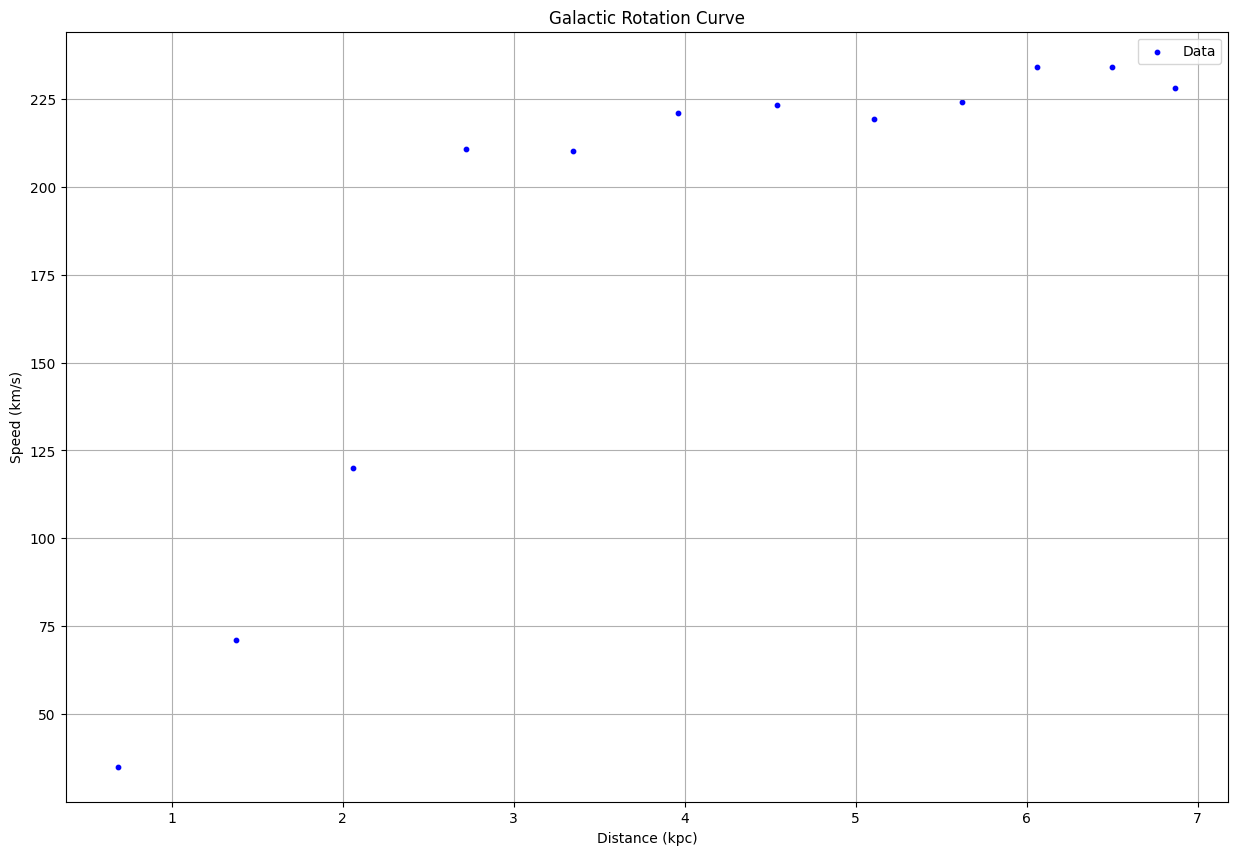

In [6]:
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

freq = 1420.405751 # MHz
c = 3e10 # cm/s

data_directory = './Data/'

means = dict()
speeds = dict()
actual = 21

for file in os.listdir(data_directory):
    if file.startswith('spectrum_d'):
        distance = float(file.split('_')[2]) # Kpc
        file_path = data_directory + file
        data = ascii.read(file_path)
        x = data['wavelngth (cm)']
        y = data['brightness']

        initial_guess = [max(y), x[np.argmax(y)], np.std(x)]
        popt, pcov = curve_fit(gaussian, x, y, p0=initial_guess)

        # # Plot the original data and the fitted Gaussian
        # plt.scatter(x, y, label='Data')
        # plt.plot(x, gaussian(x, *popt), color='red', label='Fit')
        # plt.xlabel('x')
        # plt.ylabel('y')
        # plt.legend()
        # plt.show()

        means[distance] = popt[1]
        speeds[distance] = ((means[distance] - actual) / actual)*(c/1e5)

speeds = dict(sorted(speeds.items()))

plt.figure(figsize=(15, 10))
plt.scatter(speeds.keys(), speeds.values(), label='Data', marker='o', color='blue', s=10)
plt.xlabel('Distance (kpc)')
plt.ylabel('Speed (km/s)')
plt.title('Galactic Rotation Curve')
plt.legend()
plt.grid(True)
plt.show()

